In [1]:
# Import necessary modules from manim
from manim import *

# Import necessary modules for torch
import torch
import torch.nn as nn
import torch.optim as optim
import importlib
import sys
import pandas as pd
import torch
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F


# Force reload of modules
modules_to_reload = [
    'visualizations.VanishingGradient',
    'visualizations.Encoding',
    'visualizations.SequencialProcess',
    'visualizations.TransformerProcessing',
    'visualizations.EncodingToEmbedding',
    'visualizations.EmbeddingAndPositionalEncoding',
    'visualizations.TransformerDiagram',
    'visualizations.KeyQueryValueCalculation',
    'visualizations.SplittingKeyQueryValue',
    'visualizations.MergingKeyQueryValue',
    'visualizations.LinearLayers',
    'visualizations.ScaledDotProductAttentionScene',
    'visualizations.utils',
    'visualizations.ResidualConnection',
    'visualizations.FeedForwardNetwork',
    'visualizations.TransformerProcessingDecoderVsEncoder',
    'visualizations.CatExample',
    'visualizations.AttentionBlockAnimation',
    'visualizations.AttentionBlockAnimationMasked',
]

for module in modules_to_reload:
    if module in sys.modules:
        importlib.reload(sys.modules[module])

# Import modules
from visualizations.VanishingGradient import VanishingGradient
from visualizations.Encoding import Encoding
from visualizations.SequencialProcess import SequentialProcessing
from visualizations.TransformerProcessing import TransformerProcessing
from visualizations.EncodingToEmbedding import EncodingToEmbedding
from visualizations.EmbeddingAndPositionalEncoding import EmbeddingAndPositionalEncoding
from visualizations.TransformerDiagram import TransformerDiagram
from visualizations.KeyQueryValueCalculation import KeyQueryValueCalculation
from visualizations.SplittingKeyQueryValue import SplittingKeyQueryValue
from visualizations.MergingKeyQueryValue import MergingKeyQueryValue
from visualizations.utils import BlockWithText
from visualizations.utils import ConnectedBlocks
from visualizations.utils import EmbeddingTable
from visualizations.Multi_head_attention import LinearLayers2D
from visualizations.utils import ScaledDotProductAttention
from visualizations.ScaledDotProductAttentionScene import ScaledDotProductAttentionScene
from visualizations.ResidualConnection import ResidualConnection
from visualizations.FeedForwardNetwork import FeedForwardNetwork
from visualizations.TransformerProcessingDecoderVsEncoder import TransformerProcessingDecoderVsEncoder
from visualizations.CatExample import CatExample
from visualizations.AttentionBlockAnimation import AttentionBlockAnimation
from visualizations.AttentionBlockAnimationMasked import AttentionBlockAnimationMasked


# Attention Is All You Need
by Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, and Illia Polosukhin

[link to the paper](https://arxiv.org/pdf/1706.03762)


# Outline
TL;DR: Invented the Transformer model, which is a type of NN designed to handle global and local dependencies in data.

- The motivations behind the Transformer model.
- A detailed breakdown of its architecture.
- Step-by-step construction of an encoder/decoder block used in the paper.

To explain the transformer models, and how it differs from the traditional approaches, we will use the demo sentence:
### Sentence: 
*"The cat sat on the mat."*

**Traditional Sequential Approaches:**
- **Recurrent Neural Networks (RNNs):** Process sequences one element at a time, maintaining a hidden state that captures information about previous elements.
- **Convolutional Neural Networks (CNNs):** Use fixed-size inputs, and use convolutional filters to capture local dependencies and layers to capture higher-level features.


*Limitations:* 

- Sequential processing limits parallelization, leading to longer training times.


- Struggle with long-range dependencies due to vanishing gradients.

In [2]:
%manim -qh -v CRITICAL SequentialProcessing

Manim Community v0.18.1

**Transformers**
The transformer solves these issues by using a mechanism called attention to capture affinities, or relationships, between all data pairs at the same time. This allows them to enable parallel processing of sequences, capturing both local and global dependencies.

- *Limitations:* Require significant computational resources and training data.

In [3]:
%manim -qh -v CRITICAL TransformerProcessing

Manim Community v0.18.1


To explain the Transformer model, we need to understand the following concepts:

### How a Transformer Connects the Words

A transformer model uses **self-attention** to understand the relationships between words in the sentence. Here’s a breakdown of how this process might look for each word in the sentence:
1. **Self-Attention Mechanism**: When processing the sentence, the self-attention mechanism allows each word to "attend" to every other word, determining the importance of these connections for understanding the overall context. Each word generates an attention score for every other word, indicating how much attention it should give to each.

2. **Connections Between Words**:
   - **"The"**: This word likely attends more to the noun directly following it, "cat," because articles like "the" usually define nouns. It also mildly attends to "sat" to understand what action "the cat" is performing.
   - **"Cat"**: The model gives higher attention to "sat" since it is the verb that describes what the cat is doing. It might also attend to "the" for context (definite article), but its main focus is on the action.
   - **"Sat"**: As the verb, "sat" is central to understanding the sentence's action. It attends to "cat" because it needs to know who is performing the action. It also attends to "on the mat" to complete the context of where this action is happening.
   - **"On"**: This preposition attends primarily to "the mat" because prepositions typically indicate relationships between nouns and the rest of the sentence. It might also give slight attention to "sat" to reinforce the connection between the action and the location.
   - **"The" (second occurrence)**: Similar to the first "the," it attends to "mat" since articles give context to nouns.
   - **"Mat"**: The model focuses on the preceding words ("the" and "on") to grasp that "mat" is the location of the action. It also connects back to "sat" to complete the spatial context.

### Summary
In a transformer, self-attention dynamically determines which words in the sentence are most important for understanding the context and relationships. For instance, "cat" and "sat" have a strong connection since they form the core subject-action relationship. "On the mat" adds the locational context to the action, influencing how "sat" is interpreted.

The output of each self-attention layer updates the model's understanding of each word's role within the sentence by integrating information from related words, allowing the transformer to encode the meaning and context effectively.



What is the architecture of a transformer?

In [4]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

- **Encoder**: If you want to modify or understand an input, you use the encoder.
- **Decoder**: If you want to create a new output, you use the decoder.
- **Encoder/Decoder**: If you want to create a new output based on an input, you use the encoder/decoder.

This paper uses the encoder/decorder architecture for german to english translation. So to put it into encoder/decoder simplified from above, they wanted english based on the german sentence.

In [5]:
%manim -qh -v CRITICAL TransformerProcessingDecoderVsEncoder

Manim Community v0.18.1

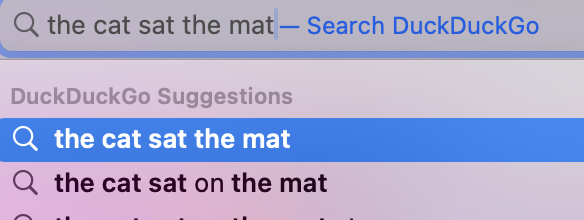

In [6]:
%manim -qh -v CRITICAL AttentionBlockAnimation

Manim Community v0.18.1

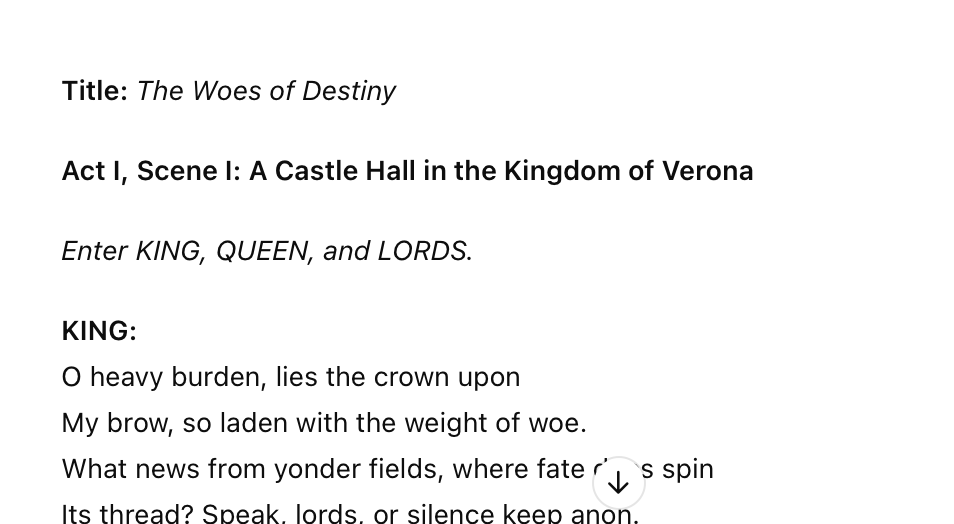

In [7]:
%manim -qh -v CRITICAL AttentionBlockAnimationMasked

Manim Community v0.18.1

In [8]:
# Comparison of Encoder and Decoder in Transformer Architecture

import pandas as pd
from IPython.display import display, HTML

data = {
    'Aspect': ['Input', 'Attention', 'Purpose', 'Masking', 'Output', 'Information flow', 'Usage in inference', 'Typical applications'],
    'Encoder': ['Processes the entire input sequence at once', 'Self-attention only', 'Encodes input into context-aware representations', 'No masking required', 'Contextual representations for each input token', 'Bidirectional (can attend to both past and future tokens)', 'Computed once for the entire input', 'Understanding input (e.g., sentiment analysis, classification)'],
    'Decoder': ['Processes output sequence step by step', 'Both self-attention and cross-attention', 'Generates output based on encoded input and previous outputs', 'Uses masking in self-attention to prevent looking ahead', 'Probability distribution over vocabulary for next token', 'Unidirectional in self-attention (can only attend to past tokens)', 'Runs iteratively to generate each output token', 'Generating output (e.g. text generation)']
}

df = pd.DataFrame(data)

# Apply custom styling
styled_df = df.style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}])

# Display the styled table
display(HTML(styled_df.to_html()))


,Aspect,Encoder,Decoder
0,Input,Processes the entire input sequence at once,Processes output sequence step by step
1,Attention,Self-attention only,Both self-attention and cross-attention
2,Purpose,Encodes input into context-aware representations,Generates output based on encoded input and previous outputs
3,Masking,No masking required,Uses masking in self-attention to prevent looking ahead
4,Output,Contextual representations for each input token,Probability distribution over vocabulary for next token
5,Information flow,Bidirectional (can attend to both past and future tokens),Unidirectional in self-attention (can only attend to past tokens)
6,Usage in inference,Computed once for the entire input,Runs iteratively to generate each output token
7,Typical applications,"Understanding input (e.g., sentiment analysis, classification)",Generating output (e.g. text generation)


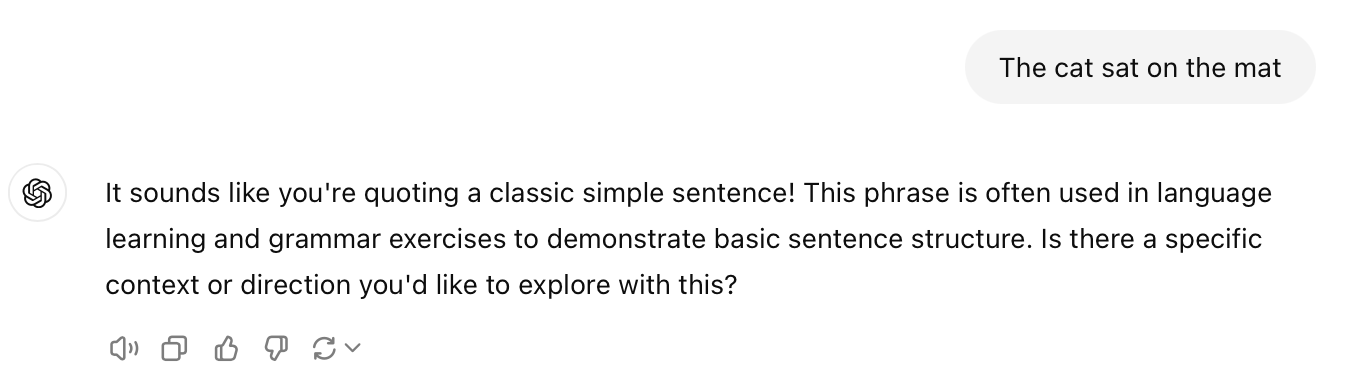

In [9]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

In [10]:
%manim -qh -v CRITICAL Encoding

Manim Community v0.18.1

In [11]:
word_to_int = {"The": 1, "cat": 2, "sat": 3, "on": 4, "the": 5, "mat": 6}
int_to_word = {v: k for k, v in word_to_int.items()}
sentence_to_numbers = lambda sentence: [word_to_int.get(word, 0) for word in sentence.split()]
numbers_to_sentence = lambda numbers: " ".join([int_to_word.get(num, "") for num in numbers])
print("Encoded:", sentence_to_numbers("The cat sat on the mat"))
print("Decoded:", numbers_to_sentence([1, 2, 3, 4, 5, 6]))


Encoded: [1, 2, 3, 4, 5, 6]
Decoded: The cat sat on the mat


In [12]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

In [13]:
%manim -qh -v CRITICAL EncodingToEmbedding

Manim Community v0.18.1

In [14]:
# Create an embedding layer
vocab_size = len(word_to_int) + 1  # +1 for start character 0
embedding_dim = 4  # This is not the same as the dimensionality of the model (dmodel), they are often the same.
# The paper uses the 512 for both the embedding and model dimensionality
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# One-liner to create embeddings for a sentence
create_embeddings = lambda sentence: embedding_layer(torch.tensor(sentence_to_numbers(sentence)))

# Example usage
sentence = "The cat sat on the mat"
encoded = sentence_to_numbers(sentence)
embeddings = create_embeddings(sentence)
print("Original sentence:", sentence)
print("Encoded:", encoded)
print("Embeddings shape:", embeddings.shape)
print("Embeddings:\n", embeddings)

Original sentence: The cat sat on the mat
Encoded: [1, 2, 3, 4, 5, 6]
Embeddings shape: torch.Size([6, 4])
Embeddings:
 tensor([[ 1.1471e+00, -5.5310e-01, -1.1389e+00, -5.9272e-01],
        [-1.7533e-01,  1.6141e+00,  1.0216e-03, -7.1667e-01],
        [-1.1103e+00,  9.8580e-02, -2.2476e-01,  1.9244e+00],
        [ 1.2383e-01,  2.9907e-02,  2.5109e-01,  1.9736e-01],
        [-4.9118e-02, -1.1209e+00, -1.0988e+00,  1.0983e+00],
        [ 7.7204e-01,  5.3512e-01,  1.0461e+00, -2.4300e-01]],
       grad_fn=<EmbeddingBackward0>)


Without positional Encoding the attention block is just a computational expensive Bag Of Words (commonly used document classifier).

In a bag of words position doesn't matter. 

dog bites man === man bites dog

By adding position, we can know the context of the words. 

In [15]:
%manim -qh -v CRITICAL EmbeddingAndPositionalEncoding

Manim Community v0.18.1

In [16]:
# Use the embeddings from earlier
seq_len, d_model = embeddings.shape

# Generate positional encodings
pe = torch.zeros(seq_len, d_model)
position = torch.arange(seq_len).unsqueeze(1).float()
div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)

# Add positional encoding to embeddings
embeddings_with_pe = embeddings + pe[:seq_len, :]

# Print shape and first couple of values
print("Embeddings with Positional Encoding Shape:", embeddings_with_pe.shape)
print("\nOriginal embeddings (first 2 positions, first 5 dimensions):")
print(embeddings[:2, :5])
print("\nPositional Encoding (first 2 positions, first 5 dimensions):")
print(pe[:2, :5])
print("First few values of embeddings with PE:")
print(embeddings_with_pe[:2, :5])  # First 2 positions, first 5 dimensions

Embeddings with Positional Encoding Shape: torch.Size([6, 4])

Original embeddings (first 2 positions, first 5 dimensions):
tensor([[ 1.1471e+00, -5.5310e-01, -1.1389e+00, -5.9272e-01],
        [-1.7533e-01,  1.6141e+00,  1.0216e-03, -7.1667e-01]],
       grad_fn=<SliceBackward0>)

Positional Encoding (first 2 positions, first 5 dimensions):
tensor([[0.0000, 1.0000, 0.0000, 1.0000],
        [0.8415, 0.5403, 0.0100, 0.9999]])
First few values of embeddings with PE:
tensor([[ 1.1471,  0.4469, -1.1389,  0.4073],
        [ 0.6661,  2.1544,  0.0110,  0.2833]], grad_fn=<SliceBackward0>)


In [17]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

In [18]:
%manim -qh -v CRITICAL LinearLayers2D

Manim Community v0.18.1

In [19]:
%manim -qh -v CRITICAL KeyQueryValueCalculation

Manim Community v0.18.1

In [20]:
seq_length = 6 # The context window
d_model = embedding_dim 
# We are using the same embedding and model dimensionality like the paper, so 4

key = nn.Linear(d_model, d_model, bias=False)
query = nn.Linear(d_model, d_model, bias=False)
value = nn.Linear(d_model, d_model, bias=False)

# Linear projections
Q = query(embeddings_with_pe)  # Shape: (seq_length, embedding_dim)
K = key(embeddings_with_pe)    # Shape: (seq_length, embedding_dim)
V = value(embeddings_with_pe)  # Shape: (seq_length, embedding_dim)

print("Q shape: ", Q.shape)
print("K shape: ", K.shape)
print("V shape: ", V.shape)

Q shape:  torch.Size([6, 4])
K shape:  torch.Size([6, 4])
V shape:  torch.Size([6, 4])


In [21]:
%manim -qh -v CRITICAL SplittingKeyQueryValue

Manim Community v0.18.1

In [22]:
num_heads = 2  # The number of attention heads
head_size = d_model // num_heads # This dk and dv, 
# note that the paper uses dk = dv = dmodel / num_heads
# though dv doesn't have to be the same as dk

Q = Q.view(seq_length, num_heads, head_size)  # (seq_length, num_heads, head_size)
K = K.view(seq_length, num_heads, head_size)  # (seq_length, num_heads, head_size)
V = V.view(seq_length, num_heads, head_size)  # (seq_length, num_heads, head_size)
Q = Q.transpose(0, 1)  # (num_heads, seq_length, head_size)
K = K.transpose(0, 1)  # (num_heads, seq_length, head_size)
V = V.transpose(0, 1)  # (num_heads, seq_length, head_size)

print("Q shape: ", Q.shape)
print("K shape: ", K.shape)
print("V shape: ", V.shape)

Q shape:  torch.Size([2, 6, 2])
K shape:  torch.Size([2, 6, 2])
V shape:  torch.Size([2, 6, 2])


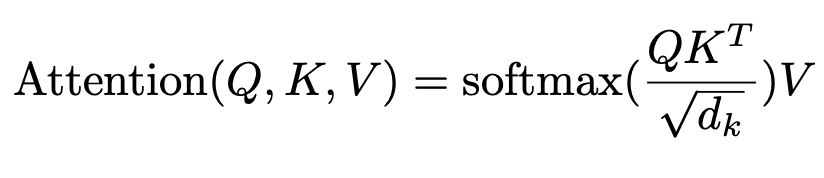

In [23]:
%manim -qh -v CRITICAL ScaledDotProductAttentionScene

Manim Community v0.18.1

In [24]:
# Scaled Dot-Product Attention

# Q shape:  torch.Size([2, 6, 2])
# K shape:  torch.Size([2, 6, 2])
# V shape:  torch.Size([2, 6, 2])

# Step 1: Compute attention scores
attn_scores = torch.matmul(Q, K.transpose(-2, -1))  # (num_heads, seq_length, seq_length)

# Step 2: Scale the scores by the square root of the head size, to be explained
attn_scores = attn_scores / torch.sqrt(torch.tensor(head_size, dtype=torch.float32))

# Step 3: Apply the mask (optional) if in the decoder
tril = torch.tril(torch.ones(seq_length, seq_length))
# Note the different variable name, since we are in the encoder, we don't need to mask. Just for demo purposes
attn_scores_masked = attn_scores.masked_fill(tril == 0, float('-inf'))
print('attn_scores_masked: \n', attn_scores_masked)

# Step 4: Apply softmax to get attention weights
attn_weights = F.softmax(attn_scores, dim=-1)  # (num_heads, seq_length, seq_length)

# Step 5: Apply attention weights to the values
attn_output = torch.matmul(attn_weights, V)  # (num_heads, seq_length, head_size)
print(attn_output.shape)


attn_scores_masked: 
 tensor([[[-0.2618,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.2256,  0.0509,    -inf,    -inf,    -inf,    -inf],
         [ 0.5491, -1.1830, -1.1264,    -inf,    -inf,    -inf],
         [ 0.3827, -0.6990, -0.7371, -0.1133,    -inf,    -inf],
         [ 0.4141, -0.5756, -0.7287, -0.1023,  0.1112,    -inf],
         [ 0.2806, -0.7514, -0.6317, -0.1100,  0.3873, -0.9395]],

        [[-0.2027,    -inf,    -inf,    -inf,    -inf,    -inf],
         [-0.3423,  0.5148,    -inf,    -inf,    -inf,    -inf],
         [-0.1138, -0.1331, -0.0568,    -inf,    -inf,    -inf],
         [-0.0304, -0.0539, -0.0131, -0.0676,    -inf,    -inf],
         [ 0.2167, -0.5435,  0.1977,  0.1758,  0.8045,    -inf],
         [-0.1478,  0.0738, -0.1015, -0.2179, -0.0497,  0.0355]]],
       grad_fn=<MaskedFillBackward0>)
torch.Size([2, 6, 2])


In [43]:
batch_size = 32 # included to make demonstration more realistic
seq_length = 6
head_size = 2
key_demo = torch.randn(batch_size, seq_length, head_size)
query_demo = torch.randn(batch_size, seq_length, head_size)
key_query_output = query_demo @ key_demo.transpose(-2, -1)
key_query_output_scaled = query_demo @ key_demo.transpose(-2, -1) * head_size**-0.5

print("key_demo variance: ", key_demo.var())
print("query_demo variance: ", query_demo.var())
print("wei variance: ", key_query_output.var())
print("wei variance: ", key_query_output_scaled.var())
print(torch.softmax(torch.tensor([0.7, -0.4, 0.2, -0.1, 0.3]), dim=-1))
print(torch.softmax(torch.tensor([0.7, -0.4, 0.2, -0.1, 0.3])*10, dim=-1))

key_demo variance:  tensor(1.0917)
query_demo variance:  tensor(1.0146)
wei variance:  tensor(2.0955)
wei variance:  tensor(1.0477)
tensor([0.3269, 0.1088, 0.1983, 0.1469, 0.2191])
tensor([9.7522e-01, 1.6288e-05, 6.5710e-03, 3.2715e-04, 1.7862e-02])


In [26]:
%manim -qh -v CRITICAL LinearLayers2D

Manim Community v0.18.1

In [27]:
%manim -qh -v CRITICAL MergingKeyQueryValue

Manim Community v0.18.1

In [28]:
# Step 6: Combine heads (flatten the num_heads dimension)
attn_output = attn_output.transpose(0, 1).contiguous()  # (seq_length, num_heads, head_size)
attn_output = attn_output.view(seq_length, d_model)  # (seq_length, d_model)

# attn_output is now the result of the multi-head attention mechanism
print(attn_output.shape)  # Should output: (seq_length, d_model)

# Step 7: final linear layer
final_linear = nn.Linear(d_model, d_model)
attn_output = final_linear(attn_output)


torch.Size([6, 4])


In [29]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

In [35]:
%manim -qh -v CRITICAL ResidualConnection

Manim Community v0.18.1

In [31]:
# Step 7: final linear layer
# final_linear = nn.Linear(d_model, d_model)
# attn_output = final_linear(attn_output)

# Step 8: Add droppouts, residual connection and normalization
dropout = nn.Dropout(0.1)  # Create a dropout layer with 10% dropout rate
attn_output = dropout(attn_output)  # Apply dropout to attention output
attn_output = attn_output + embeddings_with_pe  # Residual connection
attn_output = nn.LayerNorm(d_model)(attn_output)  # Normalization

print("attn_output: ", attn_output.shape) # shape of (seq_length, d_model)


attn_output:  torch.Size([6, 4])


In [19]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

In [32]:
%manim -qh -v CRITICAL FeedForwardNetwork

Manim Community v0.18.1

In [33]:
# Feed Forward block
first_linear = nn.Linear(d_model, 4 * d_model) # Note how there is a bias term in the linear layer
relu = nn.ReLU()
second_linear = nn.Linear(4 * d_model, d_model) # Note how there is a bias term in the linear layer
dropout = nn.Dropout(0.1)

# Apply feed forward block
ffwd_output = first_linear(attn_output)
ffwd_output = relu(ffwd_output)
ffwd_output = second_linear(ffwd_output)
ffwd_output = dropout(ffwd_output)
ffwd_output = ffwd_output + attn_output  # Residual connection
ffwd_output = nn.LayerNorm(d_model)(ffwd_output)  # Normalization
print("ffwd_output: ", ffwd_output.shape)

ffwd_output:  torch.Size([6, 4])


In [19]:
%manim -qh -v ERROR TransformerDiagram

Manim Community v0.18.1

How to train?

- Cross-entropy for the loss function
- For a translation, a human translated english is compared to the machine translated english.

In [ ]:
# =========================
# Optimizer and Loss Calculation
# =========================
def train_model(model, optimizer, loss_fn, train_data, val_data, max_iters, eval_interval):
    for iter in range(max_iters):
        # get a single training example
        x, y = get_data('train')

        # evaluate the loss
        logits, loss = model(x.unsqueeze(0), y.unsqueeze(0))
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

# Calculate loss using cross-entropy
loss_fn = nn.CrossEntropyLoss(ignore_index=0)  # Ignore padding index '0'
loss = loss_fn(output_logits.view(-1, vocab_size_decoder + 1), tgt_tensor.view(-1))

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

## Usage
The notice the input sentence, and the max sequence length (or context) is passed to the model.

In [36]:
%manim -qh -v CRITICAL CatExample

Manim Community v0.18.1

In [ ]:
def generate_translation(input_sentence, max_output_length, trained_model):
    # Convert input sentence to numerical representation
    encoded_input = sentence_to_numbers_encoder(input_sentence)
    source_tensor = torch.tensor(encoded_input).unsqueeze(0)
    
    # Initialize output sequence with a start token
    output_sequence = torch.zeros((1, 1), dtype=torch.long)
    for _ in range(max_output_length):
        # Use only the last max_output_length tokens as context
        current_output = output_sequence[:, -max_output_length:]
        # Generate logits and loss (unused) from the model
        token_logits, _ = trained_model(current_output, source_tensor)
        # Select logits for the most recent token
        latest_token_logits = token_logits[:, -1, :]  # Shape: (batch_size, vocab_size)
        # Convert logits to probabilities
        token_probabilities = F.softmax(latest_token_logits, dim=-1)  # Shape: (batch_size, vocab_size)
        # Randomly sample next token based on probabilities
        next_token = torch.multinomial(token_probabilities, num_samples=1)  # Shape: (batch_size, 1)
        # Append new token to the sequence
        output_sequence = torch.cat((output_sequence, next_token), dim=1)  # Shape: (batch_size, sequence_length + 1)
    return output_sequence


# Example usage
input_sentence = "The dog jumped over the fence"
seq_length = 10
model = create_transformer_model(vocab_size_encoder, vocab_size_decoder)
# trained_model = train_model(model, loss_fn, train_data, val_data, max_iters, eval_interval)
translated_sentence = generate_translation(input_sentence, seq_length, model)
print(f"Input: {input_sentence}")
print(f"Translation: {translated_sentence}")

Now that we have finished the encoder, we can use it to feed into the decoder.
<br> Input: The cat sat on the mat
<br> Output: It sounds like you're quoting a classic simple sentence!

In [ ]:
%manim -qh -v CRITICAL CatExample

Sources:
1. Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Proceedings of the 31st International Conference on Neural Information Processing Systems (NIPS'17). Curran Associates Inc., Red Hook, NY, USA, 6000–6010.

2. Andrej Karpathy. 2023 Let's build GPT: from scratch, in code, spelled out. Youtube https://www.youtube.com/watch?v=kCc8FmEb1nY&t=3114s

3. Cursor IDE